In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import datetime
from seaborn import violinplot
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, KFold
import scipy as sp
from sklearn.model_selection import RandomizedSearchCV


from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

#PRESENTACION DEL DATASET


data = pd.read_csv('cwurData.csv')

data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


Data wrangling
Comenzamos por analizar el dataframe, para ver si existen datos erróneos o nulos. Miro la información general del dataframe.

In [2]:
#Se presenta informacion en general del dataset con la clasificacion de sus variables
#Podemos observar que la variable Year esta considerada como un numero

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [3]:
#TAMAÑO DEL DATASET

Tamaño=data.shape

print(f"El datasets tiene {Tamaño[0]} filas y {Tamaño[1]} Columnas")

El datasets tiene 2200 filas y 14 Columnas


In [4]:
print("""Los datos tienen varias variables o atributos diferentes
 En caso del nombre de la institución y el de país es una variable nominal 
 y el resto son puntajes cualitativos""")

Los datos tienen varias variables o atributos diferentes
 En caso del nombre de la institución y el de país es una variable nominal 
 y el resto son puntajes cualitativos


Análisis exploratorio de las variables del dataset

In [5]:
data.describe().T
# Resumén: se evaluaron 2200 registros de universidades en el mundo (Cantidad de registros) y
#  evaluamos 12 variables. 

,count,mean,std,min,25%,50%,75%,max
world_rank,2200.0,459.590909,304.320363,1.00,175.75,450.5,725.250,1000.0
national_rank,2200.0,40.278182,51.740870,1.00,6.00,21.0,49.000,229.0
quality_of_education,2200.0,275.100455,121.935100,1.00,175.75,355.0,367.000,367.0
alumni_employment,2200.0,357.116818,186.779252,1.00,175.75,450.5,478.000,567.0
quality_of_faculty,2200.0,178.888182,64.050885,1.00,175.75,210.0,218.000,218.0
publications,2200.0,459.908636,303.760352,1.00,175.75,450.5,725.000,1000.0
influence,2200.0,459.797727,303.331822,1.00,175.75,450.5,725.250,991.0
citations,2200.0,413.417273,264.366549,1.00,161.00,406.0,645.000,812.0
broad_impact,2000.0,496.699500,286.919755,1.00,250.50,496.0,741.000,1000.0
patents,2200.0,433.346364,273.996525,1.00,170.75,426.0,714.250,871.0


In [6]:
#Transformamos la variable year en formato datetime y la variable score en float

data["year"]=pd.to_datetime(data["year"],format="%Y")
data["score"]=data["score"].astype(float)

In [7]:
data.nunique()

#Podemos observar las variables con mucha cardinalidad
#ademas podemos ver que las universidades corresponden a 59 paises diferentes, tenemos información de 4 años
#Contamos con 1024 universidades distintas

world_rank              1000
institution             1024
country                   59
national_rank            229
quality_of_education     367
alumni_employment        565
quality_of_faculty       199
publications             987
influence                944
citations                135
broad_impact             343
patents                  738
score                    764
year                       4
dtype: int64

In [8]:
data.isna().any()

# print("Existe una columna con nulos")

world_rank              False
institution             False
country                 False
national_rank           False
quality_of_education    False
alumni_employment       False
quality_of_faculty      False
publications            False
influence               False
citations               False
broad_impact             True
patents                 False
score                   False
year                    False
dtype: bool

In [9]:
data.fillna(0, inplace= True)
data.head()
data

#El dataset posee datos nulos en la columna broad_Impact para los años 2012 y 2013 ya que en ese momento no existía 
#información acerca de esa variable, por lo tanto los mismos fueron reemplazados con el valor 0.

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,0.0,5,100.00,2012-01-01
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,0.0,1,91.67,2012-01-01
2,3,Stanford University,USA,3,17,11,5,4,2,2,0.0,15,89.50,2012-01-01
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,0.0,50,86.17,2012-01-01
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,0.0,18,85.21,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015-01-01
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015-01-01
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015-01-01
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015-01-01


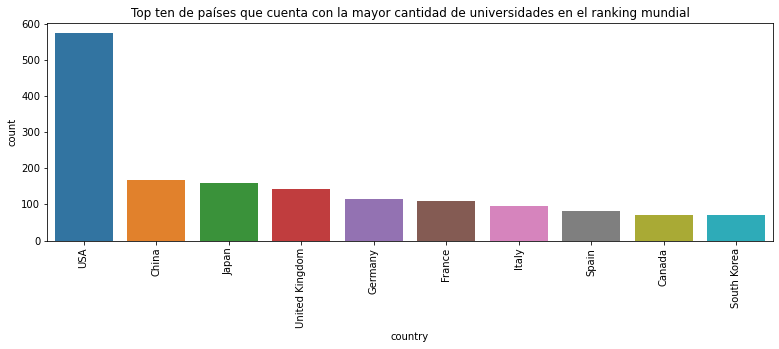

In [10]:
plt.figure(figsize=(13, 4))
plt.title('Top ten de países que cuenta con la mayor cantidad de universidades en el ranking mundial')
sns.countplot(data.country.dropna(), order =data.country.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()


#EEUU es el pais que cuenta con más universidades dentro del ranking siguiendole China y Japon

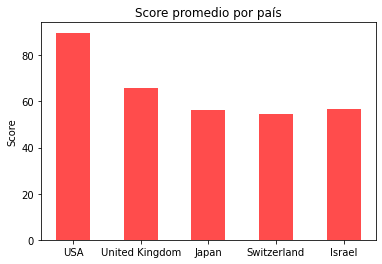

In [11]:
#Promedio de Score por país

%matplotlib inline
dFUSA = data[data.country == 'USA']
dFUK = data[data.country == 'United Kingdom']
dFJAPAN = data[data.country == 'Japan']
dFSwitzerland = data[data.country == 'Switzerland']
dFISRAEL = data[data.country == 'Israel']

score_means =[dFUSA[0:5].score.mean(),dFUK[0:5].score.mean(),dFJAPAN[0:5].score.mean(),dFSwitzerland[0:5].score.mean(),dFISRAEL[0:5].score.mean()]

plt.bar(data.country.unique()[0:5] , score_means[0:5], width=0.5, color='r',alpha = 0.7)
plt.title('Score promedio por país')
plt.ylabel('Score')
plt.show()

#Podemos observar que USA es el país que cuenta con las universiades con mayor score

<AxesSubplot:ylabel='quality_of_education'>

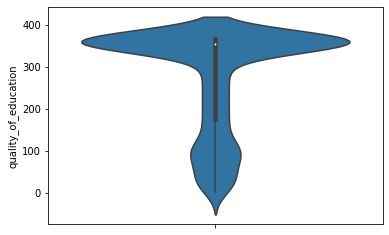

In [338]:
from seaborn import violinplot
violinplot(y=data.quality_of_education, data=data , whis=0.5)

# Se observa una acumulación entre 400 y 300 pero existe difuminacion en otros sectores

<AxesSubplot:ylabel='score'>

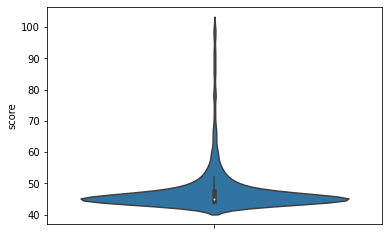

In [339]:
from seaborn import violinplot
violinplot(y=data.score, data=data , whis=0.5)

#Se observa una agrupacion de los score entre el 40 y 50

#El primer grafico muestra una agrupacion en los valores mas altos 
#El segundo grafico una agrupacion en valores mas bajos

#En quality_of_faculty se van a volver a agrupar en los numeros mas altos

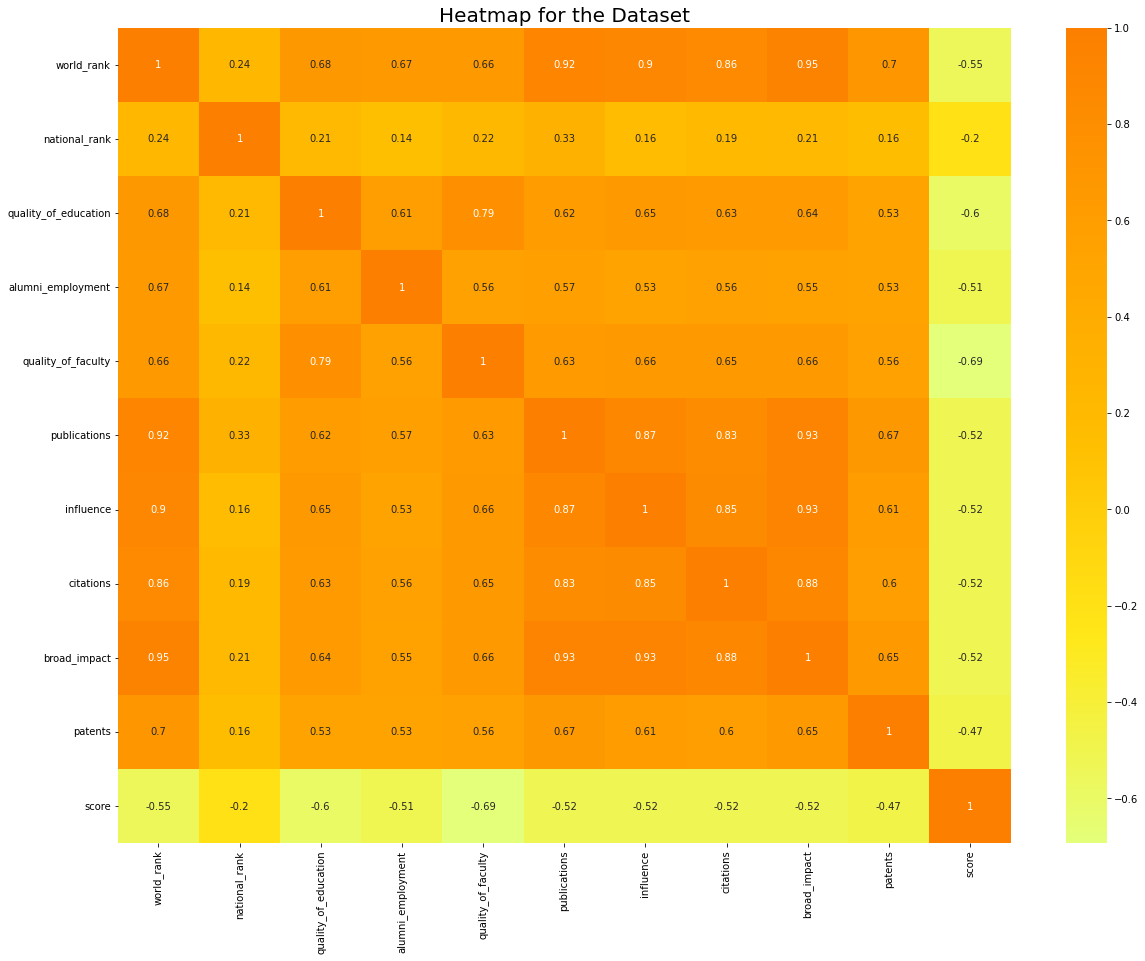

In [340]:
#Analisis de correlatividad

%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

#Existe una correñación positiva entre la variable world rank y las publicactions, citations ,influence y broad_impact

In [341]:
#Se observan otras variables correlaciones pero las mencionadas anteriormente son las varianles que mayor correlación 
#tiene respecto al ranking

data.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.953006,0.698214,-0.549098
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.214437,0.159440,-0.199756
quality_of_education,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.637312,0.528120,-0.600541
alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.550064,0.528219,-0.510374
quality_of_faculty,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.659588,0.555107,-0.693540
publications,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.932456,0.671558,-0.522111
influence,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.930940,0.611811,-0.522837
citations,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.880782,0.598728,-0.522438
broad_impact,0.953006,0.214437,0.637312,0.550064,0.659588,0.932456,0.930940,0.880782,1.000000,0.648313,-0.519377
patents,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.648313,1.000000,-0.474810


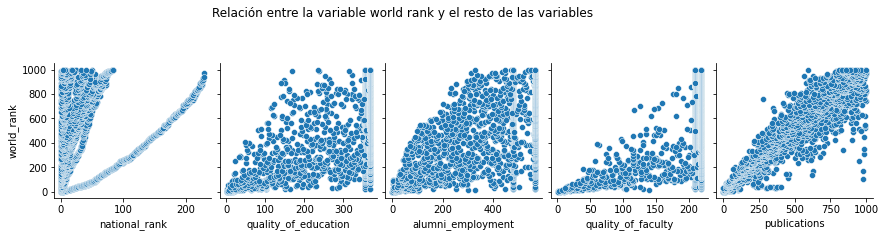

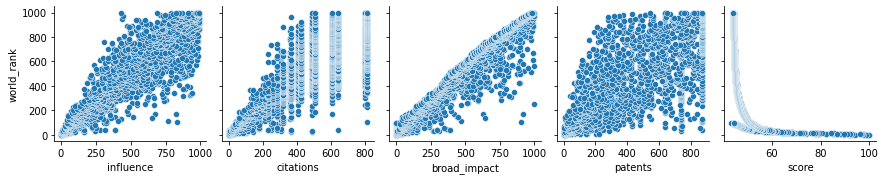

In [342]:
#A continuación presentamos algunos gráficos bivariados, comparando la variable world rank con el resto de las variables


sns.pairplot(data,x_vars = ['national_rank','quality_of_education','alumni_employment',
                       'quality_of_faculty','publications'],y_vars = 'world_rank')

plt.title('Relación entre la variable world rank y el resto de las variables', y=1.3, fontsize = 12,x=-2)


sns.pairplot(data,x_vars = ['influence','citations','broad_impact',
                       'patents','score'],y_vars = 'world_rank')

plt.show()

#Tal como venimos comentando podemos ver que las variables citations, publications, influece, broad_impact estan 
#muy relacionadas con la variable world rank,donde las universidades que tienen mejor ranking, estan mejor rankeadas 
#en estas varibles que comentamos. En algunos casos podemos ver algunas universidades que no cumplen con esta relación, 
#sobre todo en las variables citations, pero en general la regla se cumple.

#Por otra parte, en general ante mejor ranking nacional, mejor ranking mundial, pero tal como dijimos anteriomente 
#hay algunas universidades que no cumplen con esto.

#También podemos observar que las variables quality_of_education, alumni_employment, queality_of facultative, patents, 
#influyen de forma positiva en la variable world rank pero en menor medida, ya que podemos ver algunas universidades 
#que tienden a tener mejor ranking mundial pero tiene mal ranking en estas variables

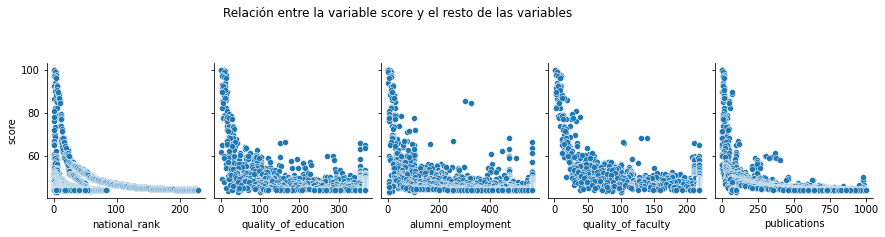

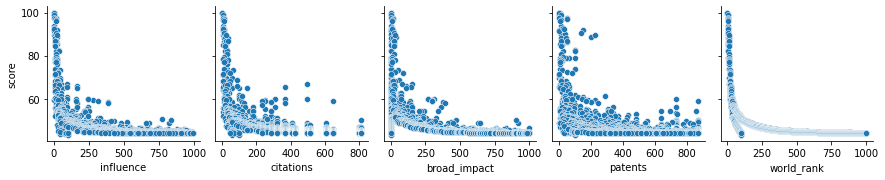

In [343]:
#En este gráfico podemos ver la relación exixtente entre todas las variables con la variable score

sns.pairplot(data,x_vars = ['national_rank','quality_of_education','alumni_employment',
                       'quality_of_faculty','publications'],y_vars = 'score')
plt.title('Relación entre la variable score y el resto de las variables', y=1.3, fontsize = 12,x=-2)


sns.pairplot(data,x_vars = ['influence','citations','broad_impact',
                       'patents','world_rank'],y_vars = 'score')
plt.show()

#Se puede observar que ante mayor score menor va a ser el ranking de la universidad tal como lo vimos anteriormente. 

#Por otro lado, sucede algo similar con las otras variables donde a mayor score mejor ranking tienen el resto de las 
#variables como publications,inlfuence, citations, broad_impact,etc pero podemos observar algunas universidades
#que cuentan con bajos scores y pero altos rakings en estas variables, por lo que podemos ver que la variable score,
#en general, depende de estas variables. Esta relación tiene a ser negativa y no es muy alta.


Text(0.5, 3, 'Relación del top ten de Universidades con la variable Score y world rank y publications')

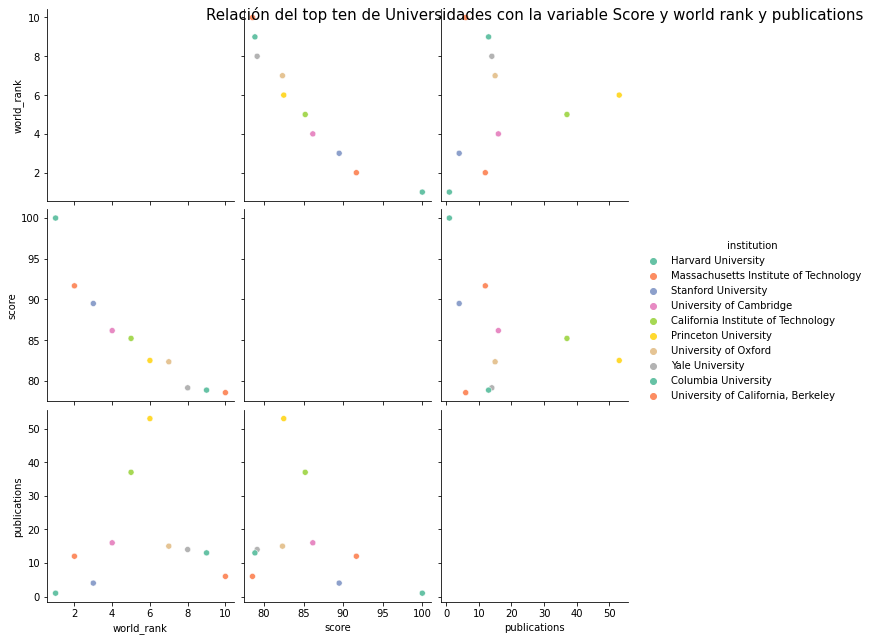

In [344]:
sns.pairplot(data.iloc[:10],hue = 'institution' , height= 3 , palette = 'Set2',vars=["world_rank","score","publications"])

plt.title('Relación del top ten de Universidades con la variable Score y world rank y publications', y=3, fontsize = 15,x=0.2)


#Haciendo un analisis de las mejores 10 universidades, podemos observar que 
#el score no baja de 75 puntos, y esto hace que su ranking mundial sea tan alto
#A mayor score, el rankig tiende a 1

Text(0.5, 3, 'Relación de las últimas 10 Universidades con la variable Score y world rank y publications')

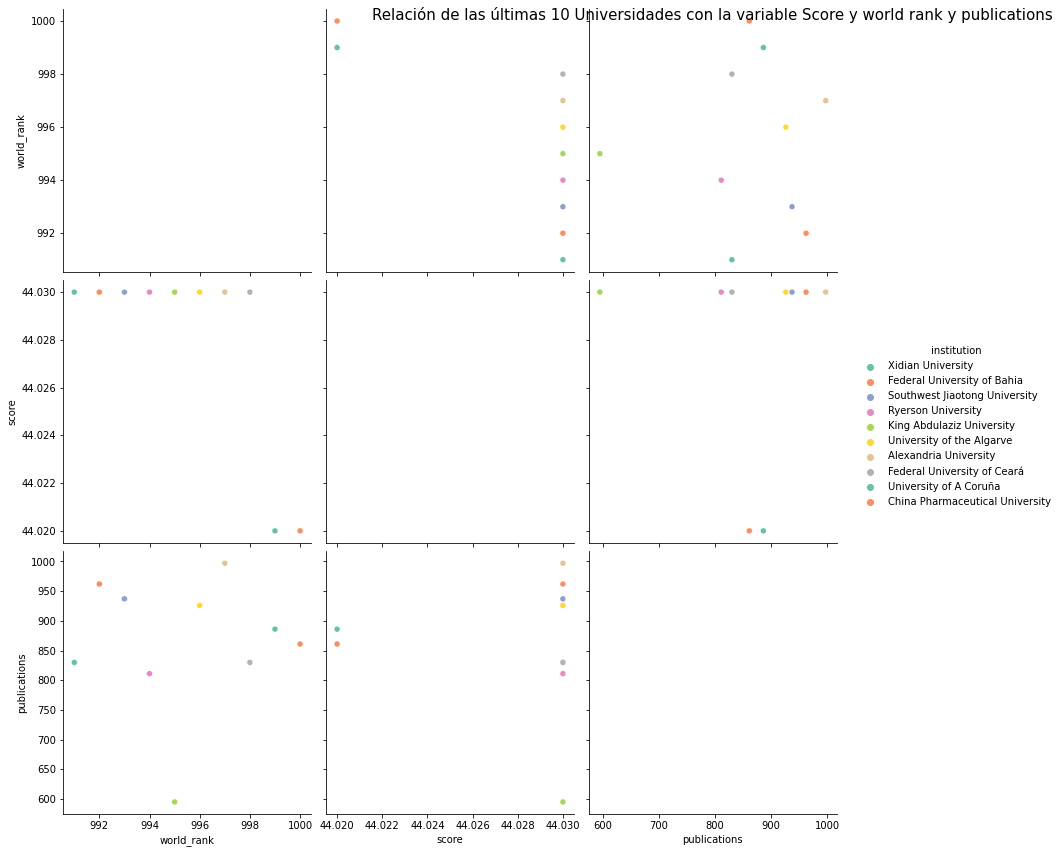

In [345]:
sns.pairplot(data.iloc[-10:],hue = 'institution' , height= 4 , palette = 'Set2',vars=["world_rank","score","publications"])

plt.title('Relación de las últimas 10 Universidades con la variable Score y world rank y publications', y=3, fontsize = 15,x=0.2)

#Todo lo contrario sucede aca, las 10 universidades con menor ranking mundial
#poseen un score que no supera los 45
#En resumen un score por debajo del 80 no te permite entrar al top 10

Text(0.7, 3, 'Score, World Rank y publications de los países United Kingdom y USA')

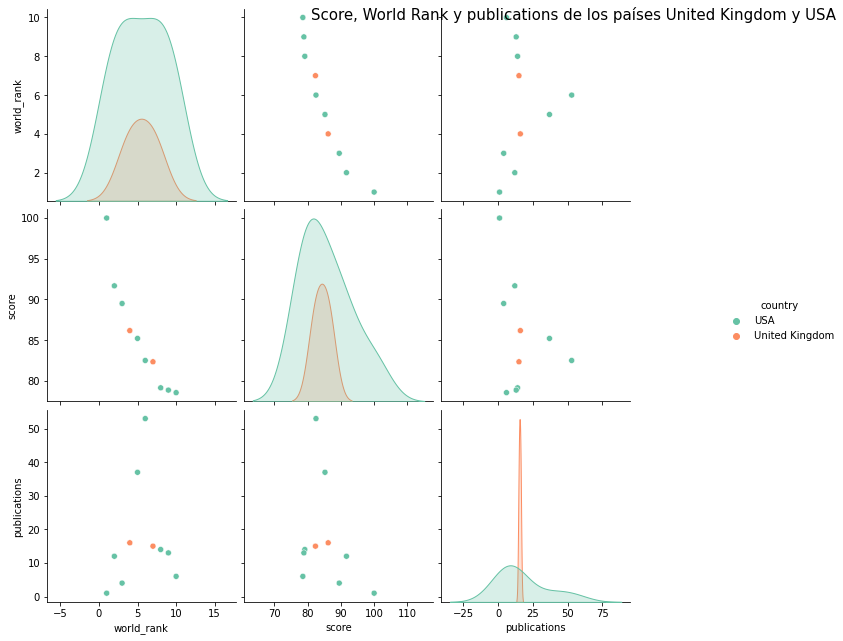

In [346]:
sns.pairplot(data.iloc[:10],hue = 'country' , height= 3 , palette = 'Set2',vars=["world_rank","score","publications"])

plt.title('Score, World Rank y publications de los países United Kingdom y USA', y=3, fontsize = 15,x=0.2)


# En concordancia con los graficos anteriores, comparamos a USA Y UK en score y World_rank
#Viendo que USA tiene una acumulacion mucho mayor que UK en Score en los primeros 10 puestos
# Teniendo los primeros puestos

Text(0.1, 3.2, 'Publications, Influence y Score de los países United Kingdom y USA')

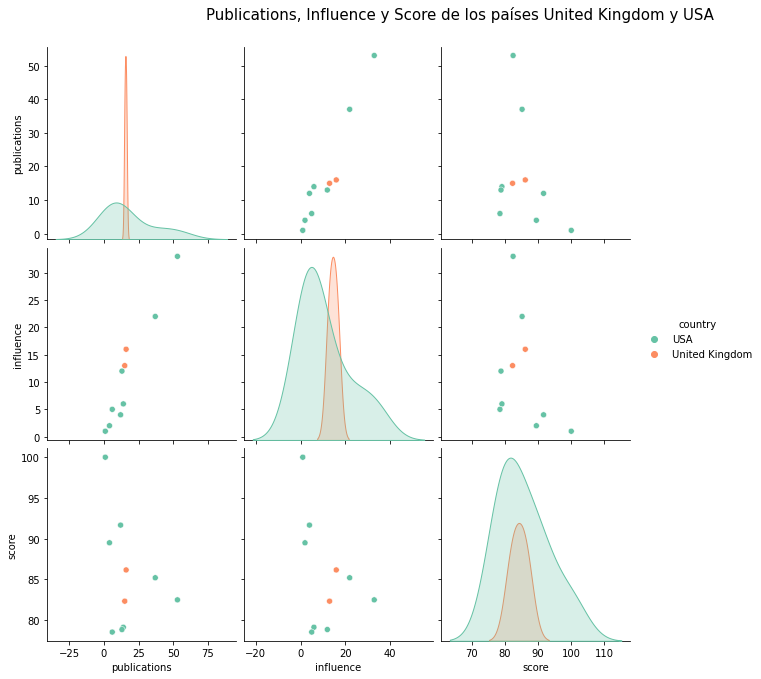

In [347]:
sns.pairplot(data.iloc[:10],hue = 'country' , height= 3 , palette = 'Set2',vars=["publications","influence","score"])
plt.title('Publications, Influence y Score de los países United Kingdom y USA', y=3.2, fontsize = 15,x=0.05)


#Se vuelve a observar la predominencia de USA por sobre UK en varios aspectos.


Text(-0.5, 3.2, 'Universidades en el top 5 del ranking')

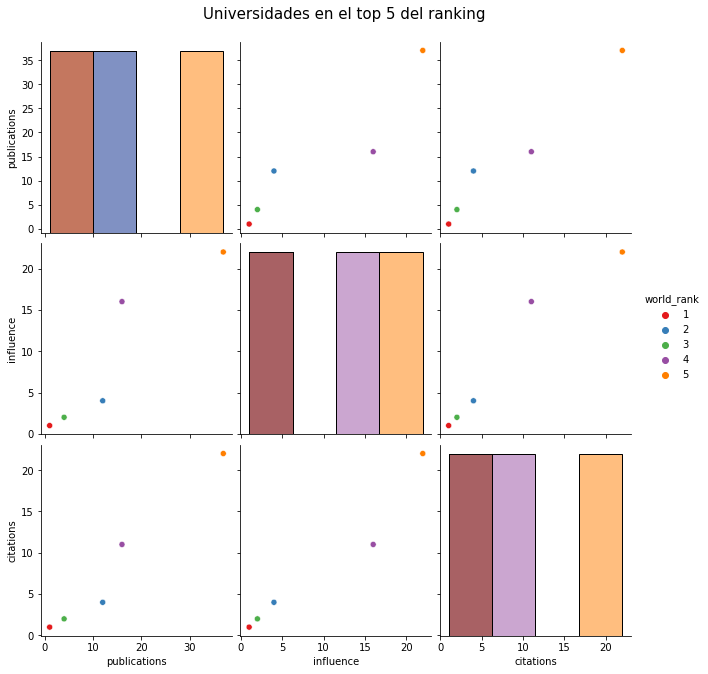

In [348]:
sns.pairplot(data.iloc[:5],hue = 'world_rank' , height= 3 , palette = 'Set1',vars=["publications","influence","citations"],diag_kind="hist")
plt.title('Universidades en el top 5 del ranking', y=3.2, fontsize = 15,x=-0.5)


#Finalmente en este grafico observamos como el ranking va bajando a medida que bajan los demas rankings.
# Y que el puesto 5 a pesar de ser top 5, esta muy detras sus puestos superiores.

   world_rank  quality_of_education  quality_of_faculty  alumni_employment  \
0           1                     7                   1                  9   
1           2                     9                   3                 17   
2           3                    17                   5                 11   
3           4                    10                   4                 24   
4           5                     2                   7                 29   
5           6                     8                   2                 14   
6           7                    13                   9                 28   
7           8                    14                  12                 31   
8           9                    23                  10                 21   
9          10                    16                   6                 52   

   publications  influence  citations  patents   score  
0             1          1          1        5  100.00  
1            12          4 

<function matplotlib.pyplot.show(close=None, block=None)>

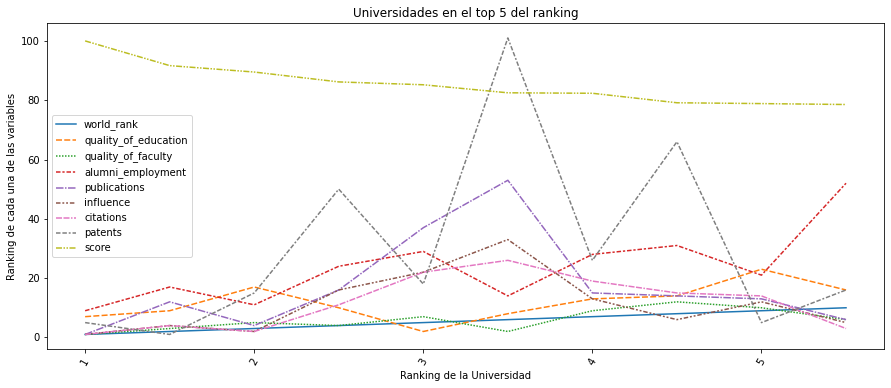

In [349]:
#Ranking Top 5 de universidades del año 2012 

top5 = data.head(10)

top5_f  = top5.loc[:,['world_rank','quality_of_education','quality_of_faculty','alumni_employment','publications','influence','citations','patents','score']]
print(top5_f)

plt.figure(figsize=(15,6))
sns.lineplot(data=top5_f,linestyle='--').set_xticklabels(labels=top5_f.index, rotation=60)

plt.title('Universidades en el top 5 del ranking')
plt.ylabel('Ranking de cada una de las variables')
plt.xlabel('Ranking de la Universidad')

plt.show

#Podemos observar, tal como venimos mencionando anteriormente que las universidades mejor rankeadas cuentan con los mejores
#ranking en las demmás variables, lo mismo sucede con la variable score, a mejor ranking, mayor score

Implementación de los Modelos

In [10]:
data['top_500'] = np.where(data['world_rank']>=500, 0, 1)
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,top_500
0,1,Harvard University,USA,1,7,9,1,1,1,1,0.0,5,100.00,2012-01-01,1
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,0.0,1,91.67,2012-01-01,1
2,3,Stanford University,USA,3,17,11,5,4,2,2,0.0,15,89.50,2012-01-01,1
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,0.0,50,86.17,2012-01-01,1
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,0.0,18,85.21,2012-01-01,1


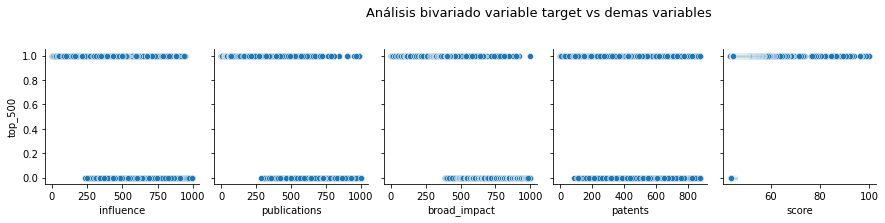

In [11]:

sns.pairplot(data,x_vars = ['influence','publications','broad_impact','patents','score'],y_vars = 'top_500',)

plt.title('Análisis bivariado variable target vs demas variables',y=1.2, fontsize = 13,x=-1.2)
plt.show()

In [12]:
data["top_500"].value_counts(normalize=True)

1    0.544545
0    0.455455
Name: top_500, dtype: float64

In [13]:
# Elimino las columnas que no me interesan, y la variable que quiero predecir

data.drop(['institution'],axis=1, inplace=True)
data.drop(['country'],axis=1,inplace=True)
data.drop(['year'],axis=1,inplace=True)
data.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,top_500
0,1,1,7,9,1,1,1,1,0.0,5,100.00,1
1,2,2,9,17,3,12,4,4,0.0,1,91.67,1
2,3,3,17,11,5,4,2,2,0.0,15,89.50,1
3,4,1,10,24,4,16,16,11,0.0,50,86.17,1
4,5,4,2,29,7,37,22,22,0.0,18,85.21,1


Modelo Regresión Logistica

Escalamos las variables

In [14]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [15]:
data_scaled = scaler.transform(data)
data_scaled = pd.DataFrame(data_scaled, columns = data.columns.values.tolist())
data_scaled.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,top_500
0,-1.507277,-0.759305,-2.199214,-1.864211,-2.777926,-1.511102,-1.512871,-1.560375,-1.463536,-1.563683,6.727841,0.914546
1,-1.503991,-0.739974,-2.182808,-1.821370,-2.746694,-1.474881,-1.502979,-1.549025,-1.463536,-1.578285,5.654255,0.914546
2,-1.500704,-0.720642,-2.117185,-1.853501,-2.715462,-1.501224,-1.509574,-1.556592,-1.463536,-1.527178,5.374581,0.914546
3,-1.497417,-0.759305,-2.174605,-1.783884,-2.731078,-1.461710,-1.463409,-1.522540,-1.463536,-1.399410,4.945405,0.914546
4,-1.494130,-0.701311,-2.240229,-1.757109,-2.684229,-1.392561,-1.443625,-1.480922,-1.463536,-1.516227,4.821678,0.914546


In [16]:
#preparamos los datos para modelar, quitando Score y Broad_impact

X = data[['national_rank','quality_of_education','alumni_employment','quality_of_faculty','publications','influence','citations','patents','broad_impact']]
y = data['top_500']

In [17]:
#Validamos el modelo subdividiendo nuestro conjunto de datos en un set de entrenamiento y otro para validar el modelo
#Para ello, subdividimos nuestros datos de entrada en forma aleatoria (mezclados) utilizando 80% de registros para entrenamiento 
#y 30% para validar.

validation_size = 0.30
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)


In [18]:

regresion_logistica = LogisticRegression()

regresion_logistica.fit(X_train,y_train)

LogisticRegression()

In [19]:
param_dist = {'C':list(range(1,10)),
              'penalty': ["l1", "l2", "elasticnet","none"], 
              'intercept_scaling':list(range(1,4)),
              "solver":["newton-cg", "lbfgs","liblinear","sag","saga"],
              "max_iter":list(range(1,10))
              }

cv = KFold(n_splits=5)

In [20]:
regresion_logistica = LogisticRegression()

regresion_logistica=GridSearchCV(regresion_logistica,param_dist,cv=cv,scoring='accuracy')

regresion_logistica.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'intercept_scaling': [1, 2, 3],
                         'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [21]:
print("Mejores parametros: "+str(regresion_logistica.best_params_))

Mejores parametros: {'C': 2, 'intercept_scaling': 3, 'max_iter': 8, 'penalty': 'l1', 'solver': 'liblinear'}


In [22]:
regresion_logistica=LogisticRegression(C=regresion_logistica.best_params_["C"],intercept_scaling=regresion_logistica.best_params_["intercept_scaling"],max_iter=regresion_logistica.best_params_["max_iter"],penalty=regresion_logistica.best_params_["penalty"],solver=regresion_logistica.best_params_["solver"])
regresion_logistica.fit(X_train,y_train)

LogisticRegression(C=2, max_iter=9, penalty='l1', solver='liblinear')

In [22]:
#Realizo una predicción

y_pred = regresion_logistica.predict(X_validation)


Métricas del modelo

In [23]:

#Calculo el accuracy en Test
train_score = regresion_logistica.score(X_train,y_train)
test_score = regresion_logistica.score(X_validation,y_validation)

test_accuracy = accuracy_score(y_validation, y_pred)
print(f'Train Score: {train_score}, Test Score: {test_score}')
print('% de aciertos sobre el set de evaluación:',test_accuracy)

Train Score: 0.9506493506493506, Test Score: 0.9181818181818182
% de aciertos sobre el set de evaluación: 0.9181818181818182


In [24]:
#Verifico la matriz de Confusión

matriz = confusion_matrix(y_validation, y_pred)
print('Matriz de Confusión:')
print(matriz)


Matriz de Confusión:
[[269  27]
 [ 27 337]]


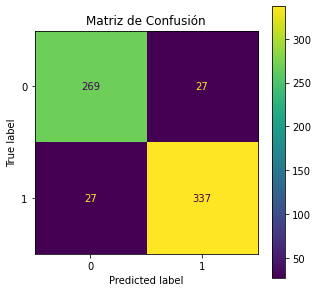

In [25]:
#Ploteamos la Matriz
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(regresion_logistica, X_validation, y_validation,ax=ax)
plt.title('Matriz de Confusión')

plt.show()

In [26]:
#Calculo la precisión del modelo

print(f"Precision Score of the classifier is: {precision_score(y_validation, y_pred)}")

Precision Score of the classifier is: 0.9258241758241759


In [27]:
# Recall
print(f"Recall Score of the classifier is: {recall_score(y_validation, y_pred)}")

Recall Score of the classifier is: 0.9258241758241759


In [28]:
# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_validation, y_pred)}")

F1 Score of the classifier is: 0.9258241758241759


AUC for our classifier is: 0.9802680427680428


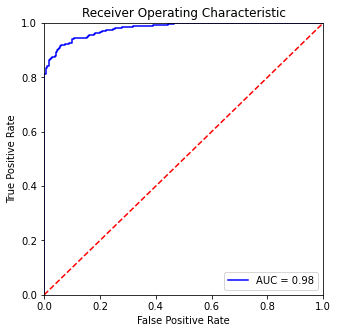

In [29]:
class_probabilities = regresion_logistica.predict_proba(X_validation)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_validation, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
fig, ax = plt.subplots(figsize=(5, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_validation, y_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_validation, y_pred)

#Precision Score
prec_score = precision_score(y_validation, y_pred)

#Recall Score
rec_score = recall_score(y_validation, y_pred)

#F1 Score
f1_score_val = f1_score(y_validation, y_pred) 

vals = ["Modelo 1: Regresión Logistica",train_accuracy, test_accuracy, prec_score, rec_score, f1_score_val]
cols = ["Model","Train Accuracy", "Test Accuracy", "Precision Score", "Recall Score", "F1 Score"]

df_metrics = pd.DataFrame([vals], columns=cols)


df_metrics

,Model,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Modelo 1: Regresión Logistica,0.918182,0.918182,0.925824,0.925824,0.925824


Modelo Árbol de Decisión

In [31]:
data.drop(['world_rank'],axis=1,inplace=True)
data

,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,top_500
0,1,7,9,1,1,1,1,0.0,5,100.00,1
1,2,9,17,3,12,4,4,0.0,1,91.67,1
2,3,17,11,5,4,2,2,0.0,15,89.50,1
3,1,10,24,4,16,16,11,0.0,50,86.17,1
4,4,2,29,7,37,22,22,0.0,18,85.21,1
...,...,...,...,...,...,...,...,...,...,...,...
2195,7,367,567,218,926,845,812,969.0,816,44.03,0
2196,4,236,566,218,997,908,645,981.0,871,44.03,0
2197,18,367,549,218,830,823,812,975.0,824,44.03,0
2198,40,367,567,218,886,974,812,975.0,651,44.02,0


In [33]:
#Preparamos los datos para el modelo de clasificación

X = data.drop(columns=["top_500","score"], axis=1)
y = data["top_500"]

In [34]:
#Separamos en train y test!
(X_train, X_test, y_train, y_test) = train_test_split(X, y,test_size=0.30,random_state=7)

In [35]:
#Al tener pocos casos de top

data["top_500"].value_counts()

1    1198
0    1002
Name: top_500, dtype: int64

In [36]:
#Creamos un arbol de decisión sencillo y lo fiteamos
tree = DecisionTreeClassifier(random_state=11)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [37]:
y_test_pred = tree.predict(X_test) #Prediccion en Test

Búsqueda de los hiperparámetros óptimos para el árbol

In [38]:
tree = DecisionTreeClassifier() 
param_grid = {'max_depth': list(range(1, 4)) , 'min_samples_leaf':[5,10,15,20]}
cv = KFold(n_splits=5)

grid = GridSearchCV(tree, param_grid, cv=cv, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='accuracy')

In [39]:
pd.DataFrame(grid.cv_results_)[['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score', 'mean_test_score' , 'std_test_score']].sort_values(by='mean_test_score',ascending=False)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
8,"{'max_depth': 3, 'min_samples_leaf': 5}",0.951299,0.948052,0.935065,0.951299,0.954545,0.948052,0.006810
9,"{'max_depth': 3, 'min_samples_leaf': 10}",0.951299,0.944805,0.938312,0.948052,0.951299,0.946753,0.004859
11,"{'max_depth': 3, 'min_samples_leaf': 20}",0.944805,0.954545,0.931818,0.938312,0.964286,0.946753,0.011543
4,"{'max_depth': 2, 'min_samples_leaf': 5}",0.964286,0.938312,0.925325,0.941558,0.948052,0.943506,0.012758
5,"{'max_depth': 2, 'min_samples_leaf': 10}",0.964286,0.938312,0.925325,0.941558,0.948052,0.943506,0.012758
10,"{'max_depth': 3, 'min_samples_leaf': 15}",0.941558,0.948052,0.931818,0.938312,0.957792,0.943506,0.008856
7,"{'max_depth': 2, 'min_samples_leaf': 20}",0.954545,0.941558,0.925325,0.931818,0.951299,0.940909,0.011134
6,"{'max_depth': 2, 'min_samples_leaf': 15}",0.954545,0.941558,0.925325,0.931818,0.944805,0.939610,0.010185
0,"{'max_depth': 1, 'min_samples_leaf': 5}",0.925325,0.905844,0.928571,0.922078,0.935065,0.923377,0.009762
1,"{'max_depth': 1, 'min_samples_leaf': 10}",0.925325,0.905844,0.928571,0.922078,0.935065,0.923377,0.009762


In [40]:
best_max_depth = grid.best_params_['max_depth']
best_min_samples_leaf = grid.best_params_['min_samples_leaf']
print('La mejor profundidad es ' + str(best_max_depth) + ' y la mejor cantidad minima de muestras por hoja es ' + str(best_min_samples_leaf))

La mejor profundidad es 3 y la mejor cantidad minima de muestras por hoja es 5


Árbol de decisiones optimizado

In [41]:
#Creamos el modelo
tree = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf ,random_state = 42) 

In [42]:
#Entrenamos el modelo
tree.fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [43]:
DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)
#Prediccion en Train
y_train_pred = tree.predict(X_train)
#Prediccion en Test
y_test_pred = tree.predict(X_test) 

Estructura del árbol

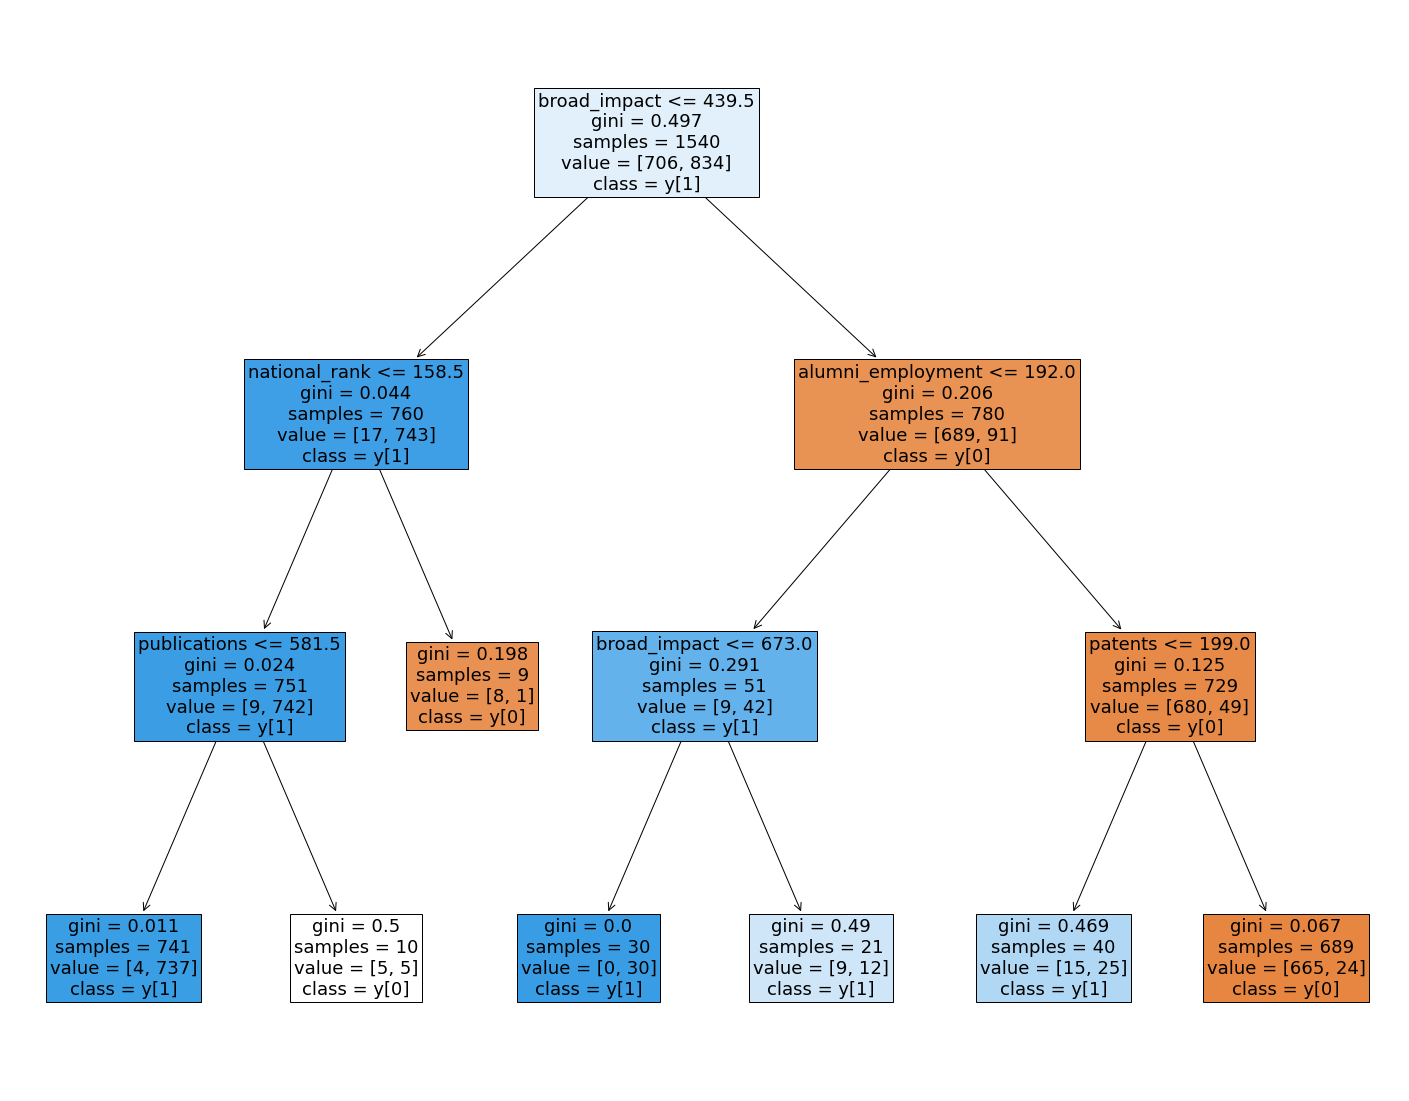

In [44]:
fig = plt.figure(figsize=(25,20))
plot = plot_tree(tree, feature_names=X.columns, filled=True, fontsize=18, class_names=True)

[Text(0, 0, 'quality_of_education'),
 Text(1, 0, 'quality_of_faculty'),
 Text(2, 0, 'influence'),
 Text(3, 0, 'citations'),
 Text(4, 0, 'publications'),
 Text(5, 0, 'national_rank'),
 Text(6, 0, 'patents'),
 Text(7, 0, 'alumni_employment'),
 Text(8, 0, 'broad_impact')]

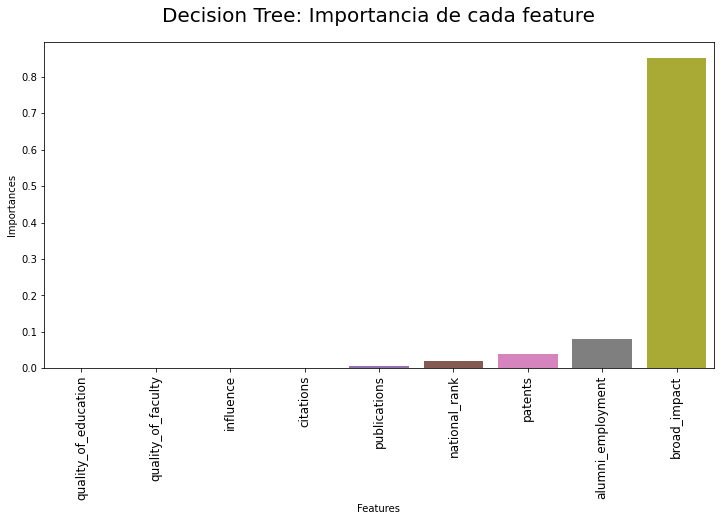

In [45]:
importances = tree.feature_importances_
columns = X.columns

df_feat = pd.DataFrame()
df_feat["Features"] = X.columns
df_feat["Importances"] = tree.feature_importances_
df_feat.sort_values(["Importances"], inplace=True)

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

bp = sns.barplot(x=df_feat["Features"], y=df_feat["Importances"])
bp.axes.set_title("Decision Tree: Importancia de cada feature",fontsize=20, pad=20)
bp.set_xticklabels(bp.get_xticklabels(),rotation = 90, fontsize=12)

#Vemos que, como esperábamos a partir del análisis exploratorio univariado, la característica más importante es la variable score y broad_impacto
#esto tiene sentido ya que la variable score se puntua de acuerdo al ranking de las demás variables y de acuerdo al score se define el ranking mundial

Métricas del Modelo

In [46]:
from sklearn.metrics import accuracy_score

train_score = tree.score(X_train,y_train)
test_score = tree.score(X_test,y_test)
print(f'Train Score: {train_score}, Test Score: {test_score}')

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

Train Score: 0.9623376623376624, Test Score: 0.9378787878787879
% de aciertos sobre el set de evaluación: 0.9378787878787879


In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))


[[272  24]
 [ 17 347]]


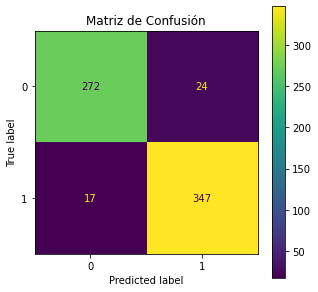

In [48]:
#Ploteamos la Matriz

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(tree, X_test, y_test,ax=ax)
plt.title('Matriz de Confusión')

plt.show()

In [49]:
# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_test, y_test_pred)}")

Precision Score of the classifier is: 0.9353099730458221


In [50]:
# Recall
print(f"Recall Score of the classifier is: {recall_score(y_test, y_test_pred)}")

Recall Score of the classifier is: 0.9532967032967034


In [51]:
# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")

F1 Score of the classifier is: 0.94421768707483


AUC for our classifier is: 0.9607634763884764


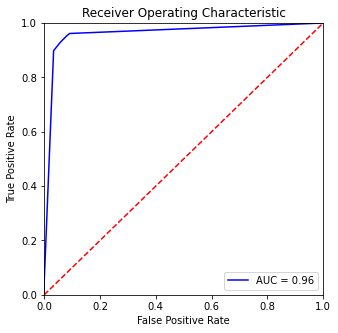

In [52]:
class_probabilities = tree.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
fig, ax = plt.subplots(figsize=(5, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:

train_accuracy = accuracy_score(y_test,y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
prec_score = precision_score(y_test, y_test_pred)
rec_score = recall_score(y_test, y_test_pred)
f1_score_val = f1_score(y_test, y_test_pred) 

vals=["Modelo 2: Decision Tree",train_accuracy, test_accuracy, prec_score, rec_score, f1_score_val]

new_row = dict(zip(df_metrics.columns, vals))
df_metrics = df_metrics.append(new_row, ignore_index=True)


df_metrics

,Model,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Modelo 1: Regresión Logistica,0.918182,0.918182,0.925824,0.925824,0.925824
1,Modelo 2: Decision Tree,0.937879,0.937879,0.935310,0.953297,0.944218


Modelo Random Forest

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")



Train Data: (1540, 9), (1540,)
Train Data: (660, 9), (660,)


In [55]:
randomtree = DecisionTreeClassifier() 

param_dist = {'max_depth':list(range(1,4)),
              'criterion': ['gini', 'entropy',"log_loss"],
              "max_features":["sqrt", "log2", None],
              "min_samples_leaf":list(range(0,10))}

cv = KFold(n_splits=5)

gridrandom = GridSearchCV(randomtree, param_dist, cv=cv, scoring='accuracy')
gridrandom.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [56]:
gridrandom.best_params_


{'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 1}

In [57]:

model=RandomForestClassifier(criterion=gridrandom.best_params_["criterion"],max_depth=gridrandom.best_params_["max_depth"],max_features=gridrandom.best_params_["max_features"],min_samples_leaf=gridrandom.best_params_["min_samples_leaf"])

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=None)

In [58]:
prediccion=model.predict(X_test)

In [59]:
#Calculo el accuracy en Test

train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

test_accuracy = accuracy_score(y_test, prediccion)

print(f'Train Score: {train_score}, Test Score: {test_score}')

print('% de aciertos sobre el set de evaluación:',test_accuracy)

Train Score: 0.9733766233766233, Test Score: 0.953030303030303
% de aciertos sobre el set de evaluación: 0.953030303030303


[[280  16]
 [ 15 349]]


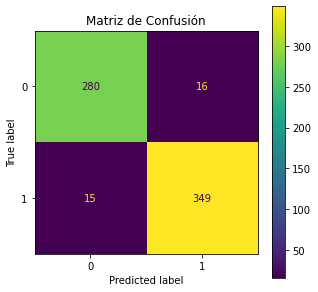

In [60]:
#Matriz de Confusión
print(confusion_matrix(y_test, prediccion))

#Ploteamos la Matriz
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(model, X_test, y_test,ax=ax)
plt.title('Matriz de Confusión')

plt.show()



In [61]:
# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_test, prediccion)}")

Precision Score of the classifier is: 0.9561643835616438


In [62]:
# Recall
print(f"Recall Score of the classifier is: {recall_score(y_test, prediccion)}")

Recall Score of the classifier is: 0.9587912087912088


In [63]:
# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test, prediccion)}")

F1 Score of the classifier is: 0.9574759945130317


AUC for our classifier is: 0.991906741906742


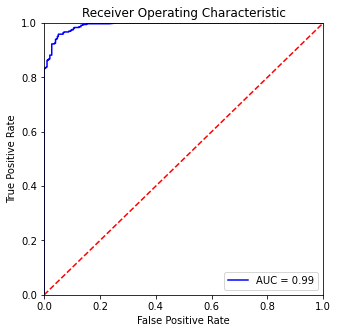

In [64]:
class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
fig, ax = plt.subplots(figsize=(5, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_test,prediccion)
test_accuracy = accuracy_score(y_test, prediccion )
prec_score = precision_score(y_test, prediccion)
rec_score = recall_score(y_test, prediccion)
f1_score_val = f1_score(y_test, prediccion) 

vals=["Modelo 3: Random Forest",train_accuracy, test_accuracy, prec_score, rec_score, f1_score_val]

new_row = dict(zip(df_metrics.columns, vals))
df_metrics = df_metrics.append(new_row, ignore_index=True)


df_metrics

,Model,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Modelo 1: Regresión Logistica,0.918182,0.918182,0.925824,0.925824,0.925824
1,Modelo 2: Decision Tree,0.937879,0.937879,0.935310,0.953297,0.944218
2,Modelo 3: Random Forest,0.953030,0.953030,0.956164,0.958791,0.957476


In [66]:
pd.DataFrame({'Variable':X.columns.values.tolist(),'Importancia':model.feature_importances_}).sort_values(by='Importancia',ascending=False).reset_index(drop=True)

,Variable,Importancia
0,broad_impact,0.836735
1,alumni_employment,0.083823
2,publications,0.033906
3,patents,0.032827
4,national_rank,0.011579
5,citations,0.000614
6,influence,0.000281
7,quality_of_education,0.000235
8,quality_of_faculty,0.000000


[Text(0, 0, 'quality_of_faculty'),
 Text(1, 0, 'quality_of_education'),
 Text(2, 0, 'influence'),
 Text(3, 0, 'citations'),
 Text(4, 0, 'national_rank'),
 Text(5, 0, 'patents'),
 Text(6, 0, 'publications'),
 Text(7, 0, 'alumni_employment'),
 Text(8, 0, 'broad_impact')]

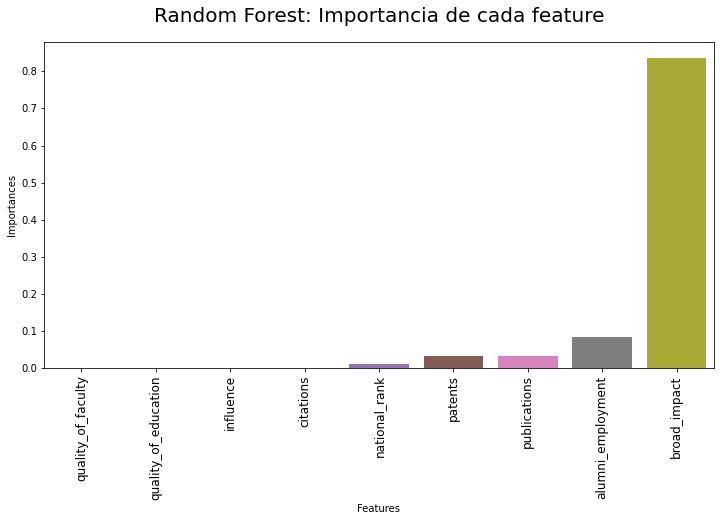

In [68]:
df_feat = pd.DataFrame()
df_feat["Features"] = X.columns
df_feat["Importances"] = model.feature_importances_
df_feat.sort_values(["Importances"], inplace=True)

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

bp = sns.barplot(x=df_feat["Features"], y=df_feat["Importances"])
bp.axes.set_title("Random Forest: Importancia de cada feature",fontsize=20, pad=20)
bp.set_xticklabels(bp.get_xticklabels(),rotation = 90, fontsize=12)

Comparación de Metricas de los modelos

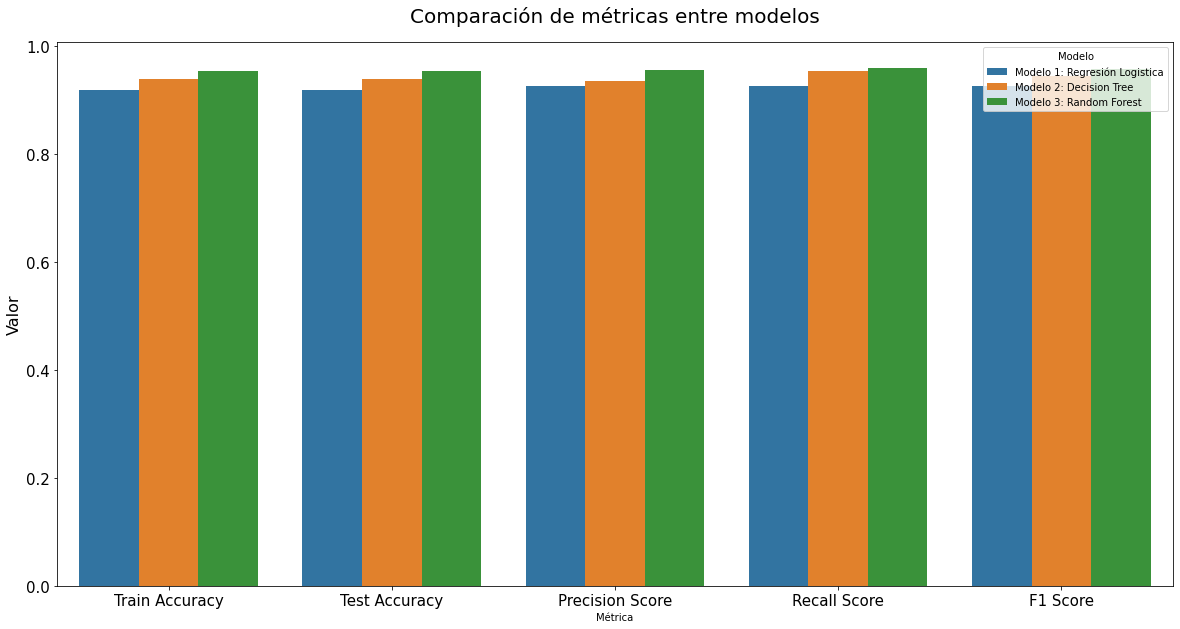

In [69]:
# hago un melt para poder hacer un gráfico de barras de cada métrica

df_melt = pd.melt(df_metrics, id_vars=['Model'], value_vars=['Train Accuracy', 'Test Accuracy', 'Precision Score',
       'Recall Score', 'F1 Score'])
df_melt = df_melt.rename(columns={"variable": "Métrica", "value": "Valor", "Model":"Modelo"})

# hago un gráfico de barras comparativo de cada una de las métricas para cada modelo

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Métrica", y="Valor", hue="Modelo", data=df_melt)
ax.axes.set_title("Comparación de métricas entre modelos",fontsize=20, pad=20)
ax.set_ylabel("Valor",fontsize=16)
ax.tick_params(labelsize=15)